In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

class_data = pd.read_csv("class_data.csv", sep=",")
class_data = class_data.drop(['Unnamed: 0'],axis=1)
class_data

,LS_type,DA_area,prob_inh,prob_dyn,slope_tan,elevation,curvature,aspect,wet_index,litho,lulc
0,0,3.0,0.0222,0.000,0.590219,1187.2250,0.032023,0.808429,5.473453,3.0,41.0
1,0,3.0,0.0156,0.140,1.238201,1215.5310,0.681722,11.066680,4.919455,6.0,41.0
2,0,3.0,0.0304,0.000,0.504280,920.3857,0.960537,105.222600,5.267390,5.0,41.0
3,0,3.0,0.0958,0.000,0.528550,850.8190,-0.689792,272.803000,7.695759,1.0,41.0
4,0,3.0,0.0404,0.004,0.635189,1645.8110,0.965224,103.165300,6.052179,5.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,1.0,0.0222,0.004,0.925330,865.0353,0.452277,152.946100,4.997249,5.0,41.0
1996,1,1.0,0.0531,0.004,0.534103,1239.7690,0.082899,74.175320,6.956621,6.0,52.0
1997,1,3.0,0.0680,0.000,0.692195,1944.5810,1.477200,27.070200,5.105042,1.0,52.0
1998,1,3.0,0.0304,1.000,0.695996,1629.1870,-0.568075,23.682760,5.372470,3.0,31.0


In [3]:
class_data['LS_type'].value_counts()

0    1500
1     500
Name: LS_type, dtype: int64

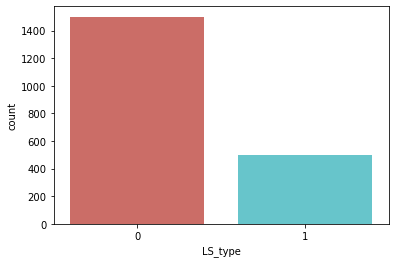

In [4]:
sns.countplot(x='LS_type',data=class_data, palette='hls')
plt.show()

It is highly imbalanced dataset. Therefore, we need to balance the dataset using either under or over sampling to prevent poor quality of prediction. In turn, I will balance the dataset using over-sampling before constructing classification models.

Text(0, 0.5, 'Frequency of landslides')

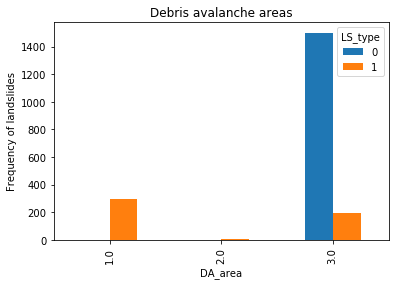

In [4]:
%matplotlib inline
pd.crosstab(class_data.DA_area,class_data.LS_type).plot(kind='bar')
plt.title('Debris avalanche areas')
plt.ylabel('Frequency of landslides')

DA_area might not be a great predictor of the outcome variable.

Text(0, 0.5, 'Frequency of landslides')

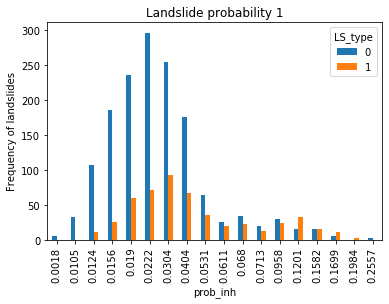

In [5]:
pd.crosstab(class_data.prob_inh,class_data.LS_type).plot(kind='bar')
plt.title('Landslide probability 1')
plt.ylabel('Frequency of landslides')

"prob_inh" might be a great predictor of the outcome variable.

([], <a list of 0 Text xticklabel objects>)

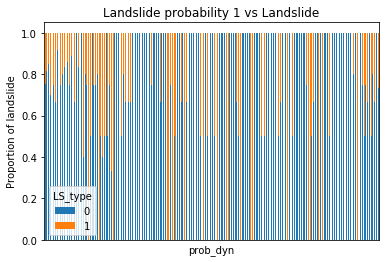

In [6]:
table=pd.crosstab(class_data.prob_dyn,class_data.LS_type)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Landslide probability 1 vs Landslide')
plt.ylabel('Proportion of landslide')
plt.xticks([])

"prob_dyn" might be a great predictor of the outcome variable.

([], <a list of 0 Text xticklabel objects>)

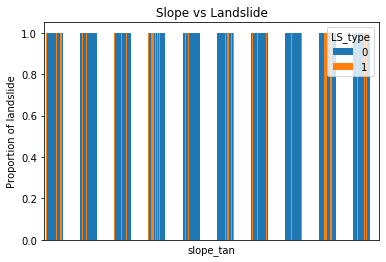

In [7]:
table=pd.crosstab(class_data.slope_tan,class_data.LS_type)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Slope vs Landslide')
plt.ylabel('Proportion of landslide')
plt.xticks([])

"slope" might not be a great predictor of the outcome variable.

([], <a list of 0 Text xticklabel objects>)

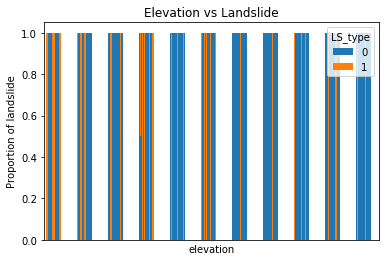

In [8]:
table=pd.crosstab(class_data.elevation,class_data.LS_type)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Elevation vs Landslide')
plt.ylabel('Proportion of landslide')
plt.xticks([])

"elevation" might not be a great predictor of the outcome variable.

([], <a list of 0 Text xticklabel objects>)

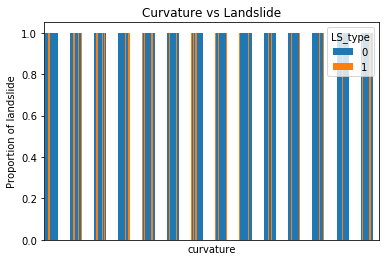

In [9]:
table=pd.crosstab(class_data.curvature,class_data.LS_type)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Curvature vs Landslide')
plt.ylabel('Proportion of landslide')
plt.xticks([])

"curvature" might not be a great predictor of the outcome variable.

"aspect" might not be a great predictor of the outcome variable.

([], <a list of 0 Text xticklabel objects>)

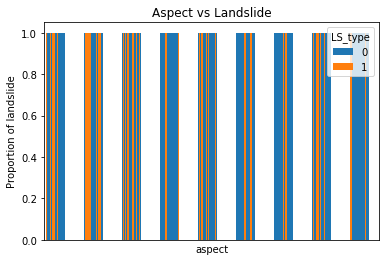

In [10]:
table=pd.crosstab(class_data.aspect,class_data.LS_type)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Aspect vs Landslide')
plt.ylabel('Proportion of landslide')
plt.xticks([])

"aspect" might not be a great predictor of the outcome variable.

([], <a list of 0 Text xticklabel objects>)

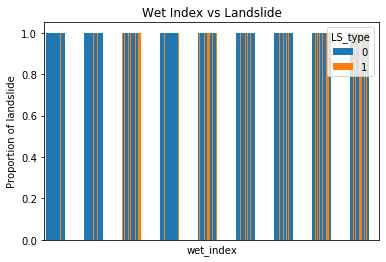

In [11]:
table=pd.crosstab(class_data.wet_index,class_data.LS_type)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Wet Index vs Landslide')
plt.ylabel('Proportion of landslide')
plt.xticks([])

"wet_index" might not be a great predictor of the outcome variable.

([], <a list of 0 Text xticklabel objects>)

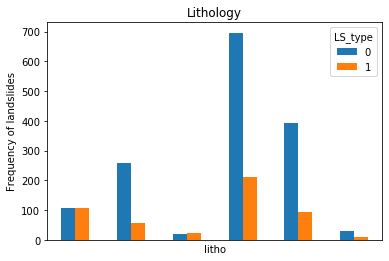

In [12]:
pd.crosstab(class_data.litho,class_data.LS_type).plot(kind='bar')
plt.title('Lithology')
plt.ylabel('Frequency of landslides')
plt.xticks([])

"Litho" might be a great predictor of the outcome variable.

([], <a list of 0 Text xticklabel objects>)

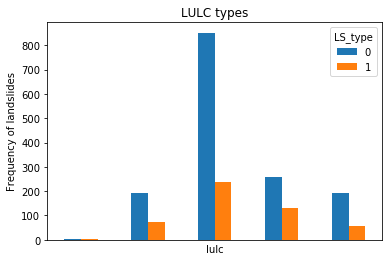

In [13]:
pd.crosstab(class_data.lulc,class_data.LS_type).plot(kind='bar')
plt.title('LULC types')
plt.ylabel('Frequency of landslides')
plt.xticks([])

"lulc" might be a great predictor of the outcome variable.

The X variables to be used are:
* prob_inh
* prob_dyn
* litho
* lulc

However, I removed these variables and the accuracy were so low when I removed all besides the variables above. Therefore, I decided to include all variables in case at this moment.

## Over Sampling

In [5]:
# Class count
count_class_0, count_class_1 = class_data.LS_type.value_counts()

# Divide by class
class_data_0 = class_data[class_data['LS_type'] == 0]
class_data_1 = class_data[class_data['LS_type'] == 1]

Random over-sampling:
1    1500
0    1500
Name: LS_type, dtype: int64


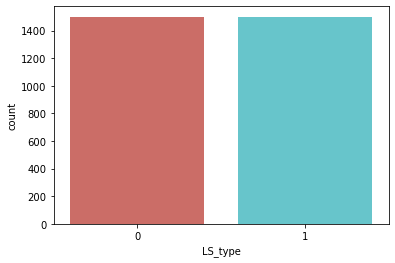

In [6]:
class_data_1_over = class_data_1.sample(count_class_0, replace=True)
test_over = pd.concat([class_data_0, class_data_1_over], axis=0)

print('Random over-sampling:')
print(test_over.LS_type.value_counts())

sns.countplot(x='LS_type',data=test_over, palette='hls')
plt.show()

# Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [8]:
y = pd.DataFrame(test_over['LS_type'])
X = test_over.drop(['LS_type'],axis=1)

## Divide into test and training dataset

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.399921
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.423    
Dependent Variable: LS_type          AIC:              2419.5256
Date:               2020-05-18 22:42 BIC:              2479.5892
No. Observations:   3000             Log-Likelihood:   -1199.8  
Df Model:           9                LL-Null:          -2079.4  
Df Residuals:       2990             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     8.0000                                      
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
DA_area     -2.4990    0.1057  -23.6486  0.0000  -2.7061  -2.2919
prob_inh    31.4429    2.5885   12.1470  0.0000  26.3695  36.5163
prob_dyn

Remove any variables that are greater than 0.05 for p-value.

In [20]:
test_over = test_over.drop(['slope_tan','curvature','aspect'],axis=1)

In [21]:
X = test_over.drop(['LS_type'],axis=1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Predicting the test set results and calculating the accuracy.

In [23]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


## Precision, Recall, F1-score, and Support.

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88       343
           1       0.95      0.69      0.80       257

    accuracy                           0.85       600
   macro avg       0.88      0.83      0.84       600
weighted avg       0.87      0.85      0.85       600



In [25]:
df = pd.DataFrame(y_pred, columns=['predicted'])
df = df.assign(actual=y_test.values)
df["diff"] = df["predicted"] - df['actual']
df['pred_category'] = [1 if x > 0.5 else 0 for x in df['predicted']]
print(df)

     predicted  actual  diff  pred_category
0            0       0     0              0
1            0       0     0              0
2            0       1    -1              0
3            1       1     0              1
4            1       1     0              1
..         ...     ...   ...            ...
595          0       0     0              0
596          0       0     0              0
597          0       0     0              0
598          0       0     0              0
599          0       1    -1              0

[600 rows x 4 columns]


## Confusion Matrix

In [26]:
pd.crosstab([df['actual']],df['pred_category'])

pred_category,0,1
actual,,
0,334,9
1,80,177


The logistic model I built has accuracy of 83% and it seems to be pretty successful with prediction.

Text(0, 0.5, 'predicted y - actual y')

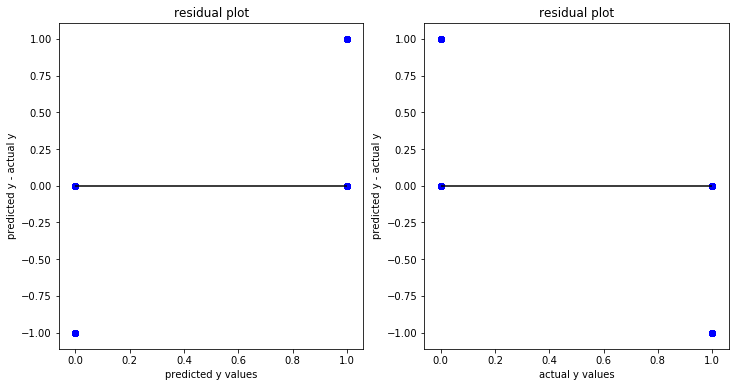

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.scatter(df["predicted"], (df["predicted"] - df['actual']), c='b')
ax1.hlines(y=0, xmin= 0, xmax=1)
ax1.set_title('residual plot')
ax1.set_xlabel('predicted y values')
ax1.set_ylabel('predicted y - actual y')

ax2.scatter(df["actual"], (df["predicted"] - df['actual']), c='b')
ax2.hlines(y=0, xmin= 0, xmax=1)
ax2.set_title('residual plot')
ax2.set_xlabel('actual y values')
ax2.set_ylabel('predicted y - actual y')

# Decision Tree

In [28]:
from sklearn import tree

In [29]:
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=4)
clf = clf.fit(X_train, y_train)

In [30]:
pip install info_gain

Note: you may need to restart the kernel to use updated packages.


In [31]:
X_train

,DA_area,prob_inh,prob_dyn,elevation,wet_index,litho,lulc
1903,3.0,0.0404,0.844,1361.0280,7.312870,5.0,71.0
1905,1.0,0.0958,0.000,188.5631,5.500013,1.0,41.0
731,3.0,0.0222,0.000,1270.1090,6.029152,3.0,41.0
271,3.0,0.0304,0.000,1444.6050,5.666097,6.0,41.0
1077,3.0,0.0713,0.000,940.9523,6.428604,1.0,41.0
...,...,...,...,...,...,...,...
763,3.0,0.0304,0.000,1544.1700,5.335909,5.0,52.0
835,3.0,0.0124,0.000,2038.7960,3.536594,3.0,52.0
1827,1.0,0.1201,0.000,927.0850,7.174031,1.0,41.0
1583,1.0,0.0222,0.000,1041.6900,5.400715,5.0,41.0


In [32]:
from info_gain import info_gain
igX1  = info_gain.info_gain(y_train.values.ravel(), X_train.iloc[:,0])
igX2  = info_gain.info_gain(y_train.values.ravel(), X_train.iloc[:,1])
igX3  = info_gain.info_gain(y_train.values.ravel(), X_train.iloc[:,2])
igX4  = info_gain.info_gain(y_train.values.ravel(), X_train.iloc[:,3])
igX5  = info_gain.info_gain(y_train.values.ravel(), X_train.iloc[:,4])
igX6  = info_gain.info_gain(y_train.values.ravel(), X_train.iloc[:,5])
igX7  = info_gain.info_gain(y_train.values.ravel(), X_train.iloc[:,6])
print("%.3f" %igX1, "%.3f" %igX2, "%.3f" %igX3, "%.3f" %igX4, "%.3f" %igX5, 
      "%.3f" %igX6)

0.275 0.054 0.078 0.691 0.693 0.020


In [33]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [35]:
conda install graphviz

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


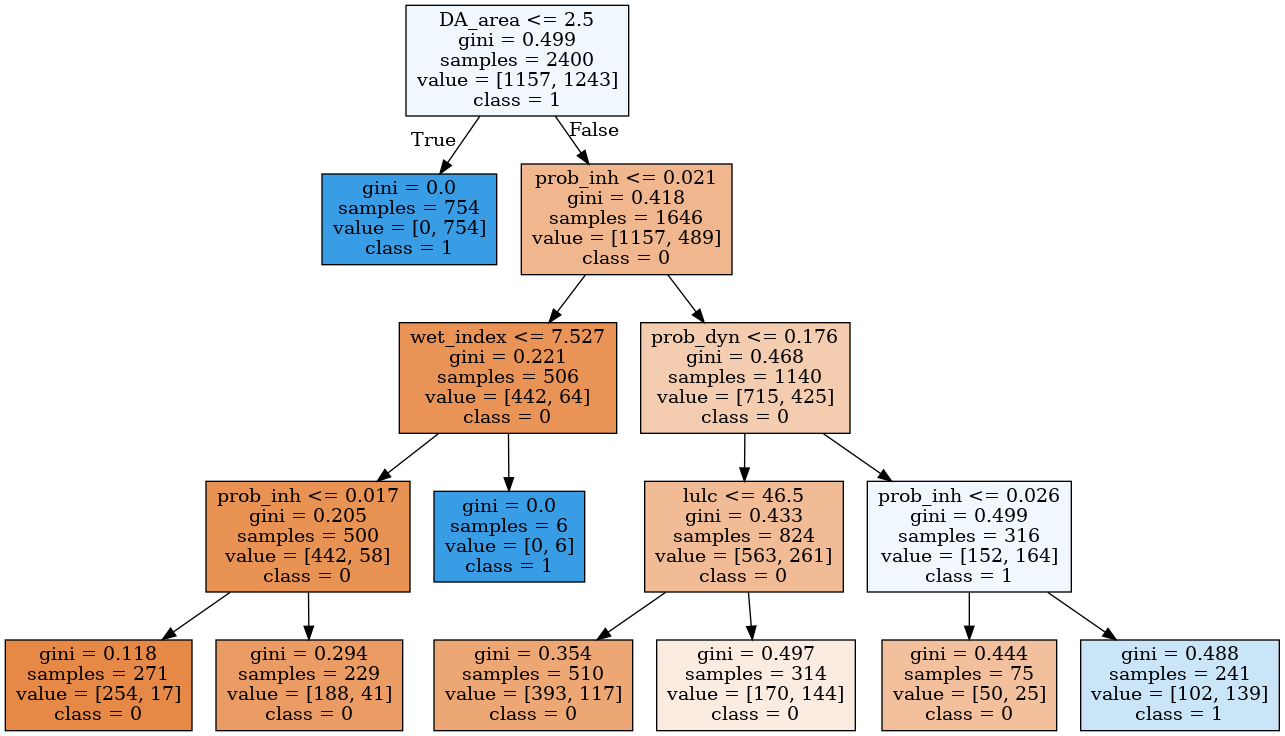

In [36]:
import pydotplus 
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['0','1'], 
                                filled=True, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

In [37]:
y_pred_test = clf.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score

print('Accuracy of decision tree classification on test data is %.2f' % (accuracy_score(y_test, y_pred_test)))

Accuracy of decision tree classification on test data is 0.86


## Applying nodes and leaf criteria for pre-pruning

In [39]:
clf2 = tree.DecisionTreeClassifier(criterion='gini', max_leaf_nodes = 3, 
                                   min_samples_leaf = 1, max_depth=6)
clf2 = clf2.fit(X_train, y_train)

In [40]:
y_pred_test = clf2.predict(X_test)
print('Accuracy of decision tree classification on test data is %.2f' % (accuracy_score(y_test, y_pred_test)))

Accuracy of decision tree classification on test data is 0.85


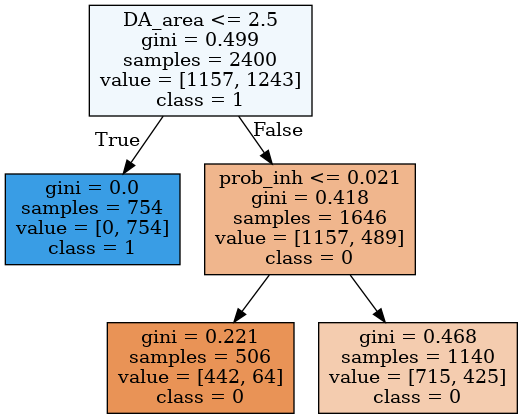

In [41]:
dot_data2 = tree.export_graphviz(clf2, feature_names=X.columns, class_names=['0','1'], 
                                 filled=True, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data2) 
Image(graph.create_png())

## Confusion Matrix

In [42]:
df = pd.DataFrame(y_pred_test, columns=['predicted'])
df = df.assign(actual=y_test.values)
df['pred_category'] = [1 if x > 0.5 else 0 for x in df['predicted']]

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix)

[[343   0]
 [ 92 165]]


In [44]:
pd.crosstab([df['actual']],df['pred_category'])

pred_category,0,1
actual,,
0,343,0
1,92,165


Post-pruning might be minimal cost-complexity way for prediction, but it is not accurate as much as the above model. Therefore, we will just stick to pre-pruning.

# K-Nearest neighbor

Text(0, 0.5, 'Accuracy')

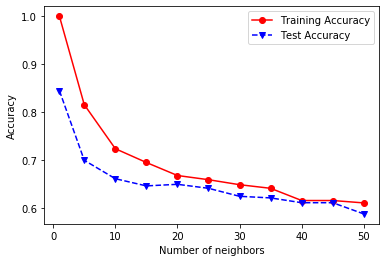

In [45]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

numNeighbors = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
trainAcc = []
testAcc = []

for k in numNeighbors:
    k_near = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    k_near.fit(X_train, y_train.values.ravel())
    y_pred_train = k_near.predict(X_train)
    y_pred_test = k_near.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_pred_train))
    testAcc.append(accuracy_score(y_test, y_pred_test))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [46]:
print('Accuracy of K-Nearest neighbor on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of K-Nearest neighbor on test set: 0.86


In [47]:
df = pd.DataFrame(y_pred_test, columns=['predicted'])
df = df.assign(actual=y_test.values)
df['pred_category'] = [1 if x > 0.5 else 0 for x in df['predicted']]

In [48]:
pd.crosstab([df['actual']],df['pred_category'])

pred_category,0,1
actual,,
0,203,140
1,107,150


For the K-nearest nodel I built, it didn't have success on predicting data accurately. 

# Support Vector Machine

In [10]:
from sklearn import svm

In [11]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(clf, X_train, y_train, cv=10)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

In [13]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy of Support Vector Machine:",metrics.accuracy_score(y_test, y_pred))

Accuracy of Support Vector Machine: 0.8316666666666667


## Confusion Matrix

In [14]:
df = pd.DataFrame(y_pred, columns=['predicted'])
df = df.assign(actual=y_test.values)
df['pred_category'] = [1 if x > 0.5 else 0 for x in df['predicted']]

pd.crosstab([df['actual']],df['pred_category'])

pred_category,0,1
actual,,
0,329,14
1,87,170


# Ensemble Methods (Random forest, bagging and boosting)

[Text(0, 0, 'Random Forest'), Text(0, 0, 'Bagging'), Text(0, 0, 'Boost')]

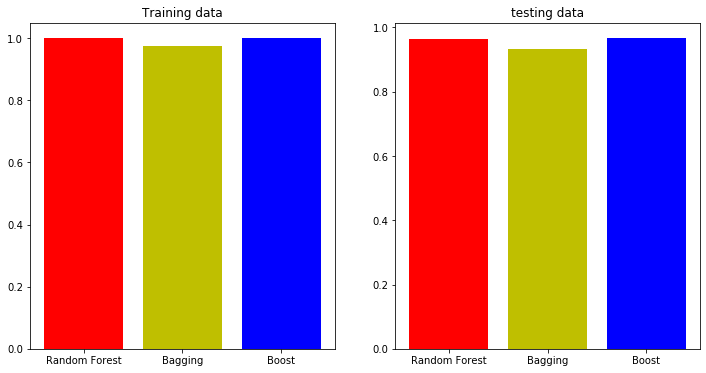

In [54]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

numBaseClassifiers = 500
maxdepth = 10
trainAcc = []
testAcc = []

random = ensemble.RandomForestClassifier(n_estimators=numBaseClassifiers)
random.fit(X_train, y_train.values.ravel())
y_pred_train_random = random.predict(X_train)
y_pred_test_random = random.predict(X_test)
trainAcc.append(accuracy_score(y_train, y_pred_train_random))
testAcc.append(accuracy_score(y_test, y_pred_test_random))

bagging = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
bagging.fit(X_train, y_train.values.ravel())
y_pred_train_bagging = bagging.predict(X_train)
y_pred_test_bagging = bagging.predict(X_test)
trainAcc.append(accuracy_score(y_train, y_pred_train_bagging))
testAcc.append(accuracy_score(y_test, y_pred_test_bagging))

boost = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
boost.fit(X_train, y_train.values.ravel())
y_pred_train_boost = boost.predict(X_train)
y_pred_test_boost = boost.predict(X_test)
trainAcc.append(accuracy_score(y_train, y_pred_train_boost))
testAcc.append(accuracy_score(y_test, y_pred_test_boost))

methods = ['Random Forest', 'Bagging', 'Boost']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.set_title('Training data')
ax1.bar([1.5,2.5,3.5], trainAcc, color='ryb')
ax1.set_xticks([1.5,2.5,3.5])
ax1.set_xticklabels(methods)
ax2.set_title('testing data')
ax2.bar([1.5,2.5,3.5], testAcc, color='ryb')
ax2.set_xticks([1.5,2.5,3.5])
ax2.set_xticklabels(methods)

In [55]:
print("Accuracy of random:{:.3f}".format(metrics.accuracy_score(y_test, y_pred_test_random)))
print("Accuracy of bagging:{:.3f}".format(metrics.accuracy_score(y_test, y_pred_test_bagging)))
print("Accuracy of boosting: {:.3f}".format(metrics.accuracy_score(y_test, y_pred_test_boost)))

Accuracy of random:0.965
Accuracy of bagging:0.932
Accuracy of boosting: 0.967


In [56]:
# Confusion Matrix for Random Forest
df = pd.DataFrame(y_pred_test_random, columns=['predicted'])
df = df.assign(actual=y_test.values)
df['pred_category'] = [1 if x > 0.5 else 0 for x in df['predicted']]
pd.crosstab([df['actual']],df['pred_category'])

pred_category,0,1
actual,,
0,332,11
1,10,247


In [57]:
# Confusion Matrix for Bagging
df = pd.DataFrame(y_pred_test_bagging, columns=['predicted'])
df = df.assign(actual=y_test.values)
df['pred_category'] = [1 if x > 0.5 else 0 for x in df['predicted']]
pd.crosstab([df['actual']],df['pred_category'])

pred_category,0,1
actual,,
0,323,20
1,21,236


## Build variables to be used for creating box plots

In [58]:
k_near_scores = cross_val_score(k_near, X_train, y_train, cv=10)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: 

In [59]:
# SVM
# svm_scores

In [60]:
decision_trees_scores = cross_val_score(clf2, X_train, y_train, cv=10)

In [61]:
random_scores = cross_val_score(random, X_train, y_train, cv=10)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: Dat

In [62]:
bagging_scores = cross_val_score(bagging, X_train, y_train, cv=10)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

In [63]:
boost_scores = cross_val_score(boost, X_train, y_train, cv=10)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

# Conclusion

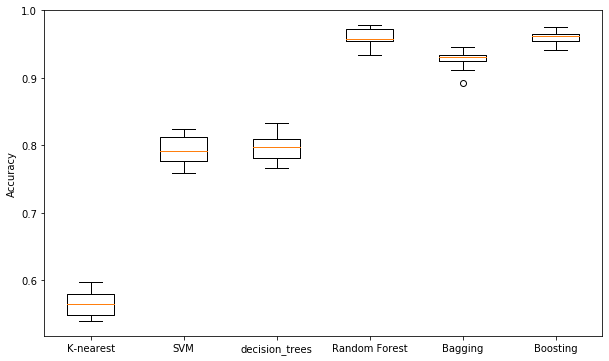

In [64]:
plt.figure(figsize=(10,6))
plt.boxplot([k_near_scores, svm_scores, decision_trees_scores, random_scores, bagging_scores, boost_scores], 
            labels=('K-nearest', 'SVM', 'decision_trees', 'Random Forest', 'Bagging', 'Boosting'))
plt.ylabel('Accuracy')
plt.show()                                                                  

The highest accuracy among the models that I have built is "Ensemble methods (Boosting)" 